## Notebook to run gridsearch for best hyperparameter combination

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from torch.utils.data import DataLoader, random_split
from iwc2tb.GMI.gmiData import gmiData
import os

from typhon.retrieval.qrnn import set_backend, QRNN
set_backend("pytorch")

In [2]:
def quantile_loss(y_pre, y, quantiles):
    loss = 0
    for i in range(len(quantiles)):
        dy = y_pre[:, 3] - y
        qs = quantiles[i]
        l = np.where(dy >= 0.0, 
                        (1.0 - qs) * abs(dy),
                        (qs) * abs(dy))
        loss += l.mean()
    return loss.mean() 

### set hyperparameters

In [3]:
#quantiles        = np.array([0.002, 0.03, 0.16, 0.5, 0.84, 0.97, 0.998])
quantiles         = np.arange(0.05, 1, 0.05)

batchSize         = 256

depth             = 4
width             = 256
convergence_epoch = 5
maximum_epoch     = 60

inputs            = ['ta', 't0', 'lat', 'stype']
ninputs            = 7

inChannels = np.array(['166.5V', '166.5H', '183+-3', '183+-7'], dtype=object)

## training

In [4]:
def train(depth, width, batchSize, convergence_epoch, maximum_epoch, training_data, validation_data):
        qrnn = QRNN(ninputs, quantiles, (depth, width , "relu"))
        for lr in [  0.01, 0.001, 0.0001]:
            print ("NEW LEARNING RATE")
            results = qrnn.train(
                training_data,
                validation_data,
                batch_size=batchSize,
                momentum = 0.9,
                sigma_noise=None,
                initial_learning_rate= lr ,
                maximum_epochs=maximum_epoch,
                convergence_epochs= convergence_epoch,    
                gpu=True)

        return results, qrnn



### read training data

In [5]:
data = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train.nc"), 
               inputs, latlims = [45, 65],
               batch_size = batchSize, log = False)  

n = len(data)
n_train = int(0.9 * n)
n_val = n - n_train

training_data, validation_data = random_split(data, [n_train, n_val])
results = []

ta
t0
lat
stype
minimum 0.0


### start training

In [6]:
epochs     = [5, 10, 15]
nn_depths  = [ 4, 5, 6]
nn_widths  = [ 128, 256, 512]

In [ ]:

for epoch in epochs:
    for depth in nn_depths:
        for width in nn_widths:
            results, qrnn = train(depth, width, batchSize, epoch, maximum_epoch, training_data, validation_data)
            #print(f'qrnn_depth-{depth}_width-{width}_epoch-{epoch}.nc')
            qrnn.save(f'qrnn_depth-{depth}_width-{width}_epoch-{epoch}.nc')

NEW LEARNING RATE
Epoch 0 / 60: Training error: 0.054, Validation error: 0.051, Learning rate: 0.01000
Epoch 1 / 60: Training error: 0.052, Validation error: 0.051, Learning rate: 0.01000
Epoch 2 / 60: Training error: 0.051, Validation error: 0.049, Learning rate: 0.01000
Epoch 3 / 60: Training error: 0.048, Validation error: 0.046, Learning rate: 0.01000
Epoch 4 / 60: Training error: 0.044, Validation error: 0.041, Learning rate: 0.01000
Epoch 5 / 60: Training error: 0.037, Validation error: 0.033, Learning rate: 0.01000
Epoch 6 / 60: Training error: 0.030, Validation error: 0.028, Learning rate: 0.01000
Epoch 7 / 60: Training error: 0.027, Validation error: 0.027, Learning rate: 0.01000
Epoch 8 / 60: Training error: 0.026, Validation error: 0.026, Learning rate: 0.01000
Epoch 9 / 60: Training error: 0.025, Validation error: 0.025, Learning rate: 0.01000
Epoch 10 / 60: Training error: 0.025, Validation error: 0.024, Learning rate: 0.01000
Epoch 11 / 60: Training error: 0.024, Validati

In [8]:
y_pre = []
y = []
y_prior = []
y_pos_mean = []
x_in = []

nbatch = validation_data.__len__()
print (nbatch)
for i in range(nbatch):
    
    xx, yy = validation_data.__getitem__(i)
    
    x = xx.detach().numpy() 

    #y_prior.append((x * data.std) + data.mean)
       
    y.append(yy.detach().numpy())
    x_in.append(x)
x = np.concatenate(x_in, axis = 0) 
y = np.concatenate(y, axis= 0)

320


qrnn_depth-4_width-128_epoch-5.nc
qrnn_depth-4_width-256_epoch-5.nc
qrnn_depth-4_width-512_epoch-5.nc
qrnn_depth-5_width-128_epoch-5.nc
qrnn_depth-5_width-256_epoch-5.nc
qrnn_depth-5_width-512_epoch-5.nc
qrnn_depth-6_width-128_epoch-5.nc
qrnn_depth-6_width-256_epoch-5.nc
qrnn_depth-6_width-512_epoch-5.nc
qrnn_depth-4_width-128_epoch-10.nc
qrnn_depth-4_width-256_epoch-10.nc
qrnn_depth-4_width-512_epoch-10.nc
qrnn_depth-5_width-128_epoch-10.nc
qrnn_depth-5_width-256_epoch-10.nc
qrnn_depth-5_width-512_epoch-10.nc
qrnn_depth-6_width-128_epoch-10.nc
qrnn_depth-6_width-256_epoch-10.nc
qrnn_depth-6_width-512_epoch-10.nc
qrnn_depth-4_width-128_epoch-15.nc
qrnn_depth-4_width-256_epoch-15.nc
qrnn_depth-4_width-512_epoch-15.nc
qrnn_depth-5_width-128_epoch-15.nc
qrnn_depth-5_width-256_epoch-15.nc
qrnn_depth-5_width-512_epoch-15.nc
qrnn_depth-6_width-128_epoch-15.nc
qrnn_depth-6_width-256_epoch-15.nc
qrnn_depth-6_width-512_epoch-15.nc


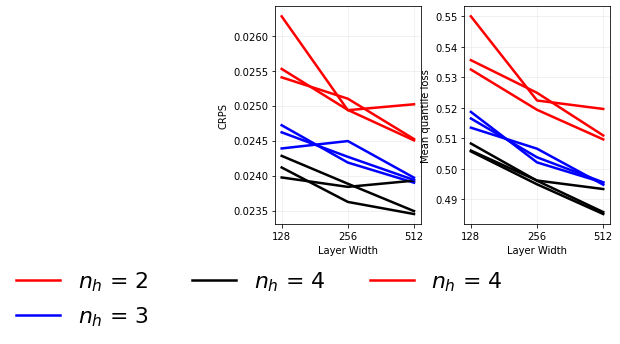

In [15]:
#path = os.path.expanduser("~/Dendrite/Projects/AWS-325GHz/ICI/qrnn_output/gridsearch/")
            
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [6, 4])
plt.subplots_adjust(wspace = .3)
#quantiles1 = np.array([0.5])
for k, epoch in enumerate(epochs):
    scores = np.empty([len(nn_depths), len(nn_widths)])
    loss = np.empty([len(nn_depths), len(nn_widths)])
    for i, nn_depth in enumerate(nn_depths):
        for j, nn_width in enumerate(nn_widths):
            filename = os.path.join(f'qrnn_depth-{nn_depth}_width-{nn_width}_epoch-{epoch}.nc')
            print(filename)
            qrnn = QRNN.load(filename)

            y_pre = qrnn.predict(x)
            y0 = y
    #        scores = qrnn.crps(y_pre, y, quantiles)
            scores[i,j] = np.mean(qrnn.crps(y_pre, y0, quantiles))

            loss[i,j] = quantile_loss(y_pre, y0, quantiles)
            

    #fig.tight_layout()
    color = ['r', 'b', 'k']
    for i in range(len(nn_depths)):
        ax1.plot(scores[i, :], linewidth = 2.5, c = color[i])
    ax1.set_xlabel("Layer Width")
    ax1.set_ylabel("CRPS")
    ax1.set_xticks(np.arange(len(nn_widths)))
    ax1.set_xticklabels(nn_widths)
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
    ax1.grid(which = 'both', alpha = 0.2)
    #ax.set_yscale('log')
    #ax1.legend(["$n_h$ = 2", "$n_h$ = 3", "$n_h$ = 4", "$n_h$ = 4"], prop={'size': 20})

    for i in range(len(nn_depths)):
        ax2.plot(loss[i, :], linewidth = 2.5, c = color [i])
    ax2.set_xlabel("Layer Width")
    ax2.set_ylabel("Mean quantile loss")
    ax2.set_xticks(np.arange(len(nn_widths)))
    ax2.set_xticklabels(nn_widths)

    ax2.yaxis.set_minor_locator(MultipleLocator(1.5))
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.grid(which = 'both', alpha = 0.2)
    #ax.set_yscale('log')
    (ax2.legend(["$n_h$ = 2", "$n_h$ = 3", "$n_h$ = 4", "$n_h$ = 4"],
                prop={'size': 22}, frameon = False, bbox_to_anchor=(0.4, -0.12),ncol=3))

    fig.savefig("CRPS.pdf", bbox_inches = 'tight')